# PRACTICA 6 - DISE√ëO DE FILTROS DIGITALES
#### David Alejandro Henao , Maria Camila Bravo E 

In [312]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter,filtfilt

### 1. Creaci√≥n de se√±al 

#### Se definieron los parametros predichos , y una se√±al sinoidal dentro del rango de 0 a 1000 considerando un proceso electrofisiol√≥gico registrado sobre la superficie de la piel, considerando la atenuaci√≥n y el retraso temporal que experimenta al atravesar diversos tejidos.

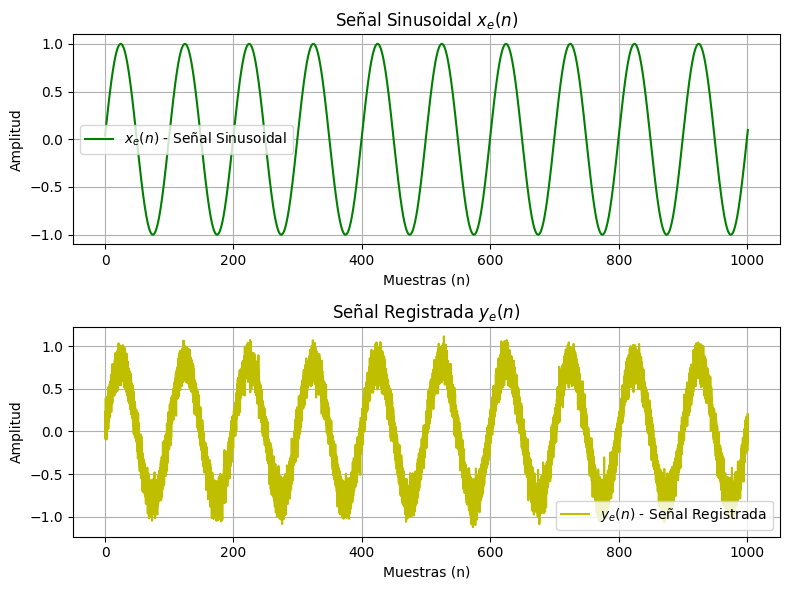

In [313]:
#PARAMETROS
F_0 = 0.01  #Frecuencia Inicial en HZ 
F_s = 25   #Frecuencia en HZ 
D = 15     #Numero de muestras 
alpha = 0.8 
sigma_squared = 0.01  #Varianza
n = np.arange(0,1001,1/F_s) #tiempo

# Generaci√≥n de la se√±al sinusoidal x_e(n)
x_e = np.sin(2 * np.pi * F_0 *  (n + 15 / F_s))
# Generaci√≥n del ruido gaussiano w(n)
w = np.random.normal(0, np.sqrt(sigma_squared), len(n))
# Generaci√≥n de la se√±al registrada y_e(n) = ùõºùë•ùëí(ùëõ‚àíùê∑)+ùë§(ùëõ)
y_e = alpha* x_e + w

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)# Gr√°fico de la se√±al original x_e(n)
plt.plot(n, x_e, label='$x_e(n)$ - Se√±al Sinusoidal', color='green')
plt.title('Se√±al Sinusoidal $x_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)# Gr√°fico de la se√±al registrada y_e(n)
plt.plot(n, y_e, label='$y_e(n)$ - Se√±al Registrada', color='y')
plt.title('Se√±al Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar las gr√°ficas
plt.tight_layout()
plt.show()


### 2. Dise√±o de un Filtro 

####  1. FILTRO FIR

#### Considerando lo principales parametros de entrada  N: Orden del filtro y W_n: Frecuencia de corte. Se tiene que para filtros digitales W_n est√° normalizado entre 0 y 1, esto se obtiene dividiendo la frecuencia de muestreo sobre dos. Para Obtener los filtros se usa la funci√≥n Firwin.

In [314]:
#PARAMETROS 
orden = 30
fc = 1.25
fc2= 7.5
fs = 25
nyquist = fs/2
wn1 = fc/nyquist
wn2= fc2/nyquist

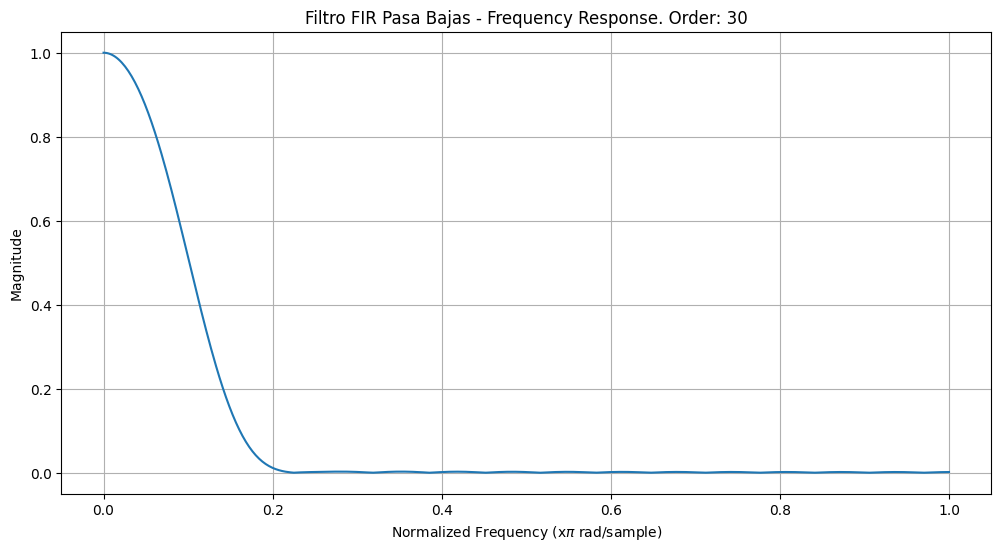

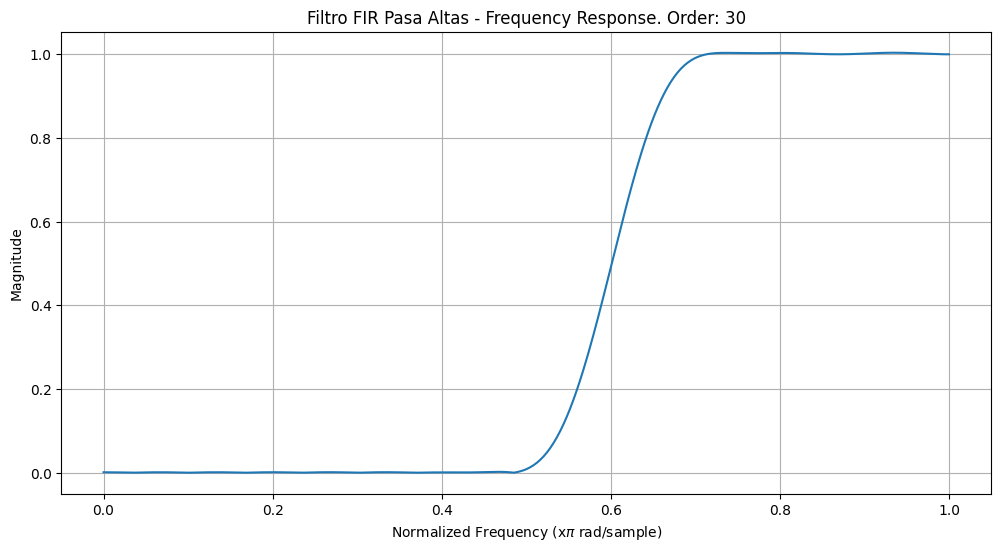

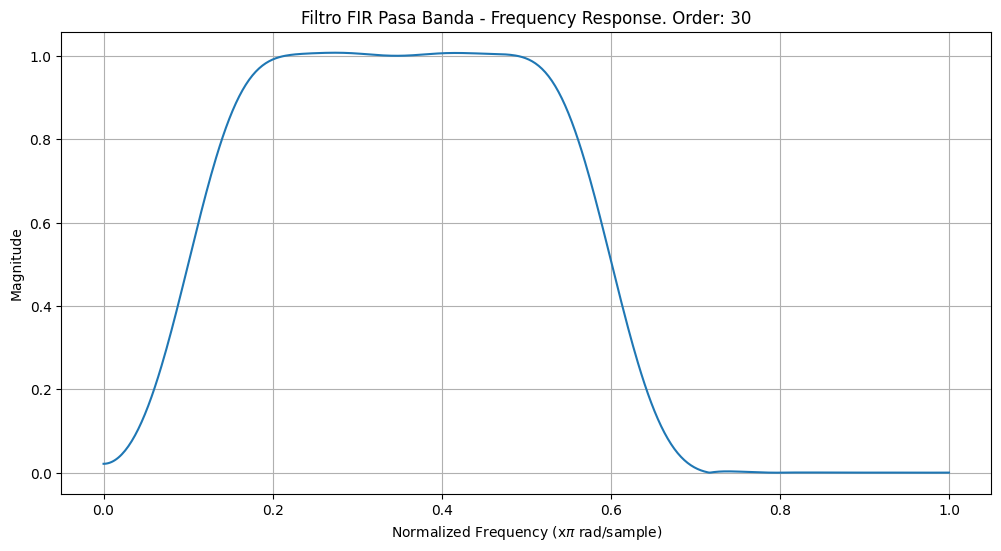

In [315]:
# FIR pasa bajas
FIRpasabajas = signal.firwin(orden + 1, wn1, pass_zero='lowpass', window='hamming')
y_e_fir_low = signal.lfilter(FIRpasabajas, 1.0, y_e)

# FIR pasa altas
FIRpasaltas = signal.firwin(orden + 1, wn2, pass_zero=False, window='hamming')
y_e_fir_high = signal.lfilter(FIRpasaltas, 1.0, y_e)

# FIR pasa banda
FIRpasabanda = signal.firwin(orden + 1, [wn1, wn2], pass_zero=False, window='hamming')
y_e_fir_band = signal.lfilter(FIRpasabanda, 1.0, y_e)

# Funci√≥n para graficar las respuestas en frecuencia
def graficar_rpta(b, a, orden, nyq_rate=1, titulo=''):
    w, h = signal.freqz(b, a)
    plt.figure(figsize=(12, 6))
    plt.plot((w / max(w)) * nyq_rate, abs(h))
    plt.ylabel('Magnitude')
    plt.xlabel(r'Normalized Frequency (x$\pi$ rad/sample)')
    plt.title(titulo + ' - Frequency Response. Order: ' + str(orden))
    plt.grid(True)
    plt.show()

# Gr√°ficas de las respuestas en frecuencia para cada filtro con t√≠tulos
graficar_rpta(FIRpasabajas, 1, orden, titulo='Filtro FIR Pasa Bajas')
graficar_rpta(FIRpasaltas, 1, orden, titulo='Filtro FIR Pasa Altas')
graficar_rpta(FIRpasabanda, 1, orden, titulo='Filtro FIR Pasa Banda')


#### ¬øQu√© cambios hay en los argumentos de la funci√≥n para implementar un filtro pasa banda y pasa altas? 

Para poder implementar un filtro pasa altas habria que cambiar el argumento pass_zero en la funci√≥n firwin a 'highpass' como se muestra a anteriormente. Y para implementar un filtro pasa bandas se tendr√≠a que tener una frecuencia de corte adicional y poner el rango en la funcio√≥n firwin al igual que el argumento 'passband'

# Forma de la se√±al

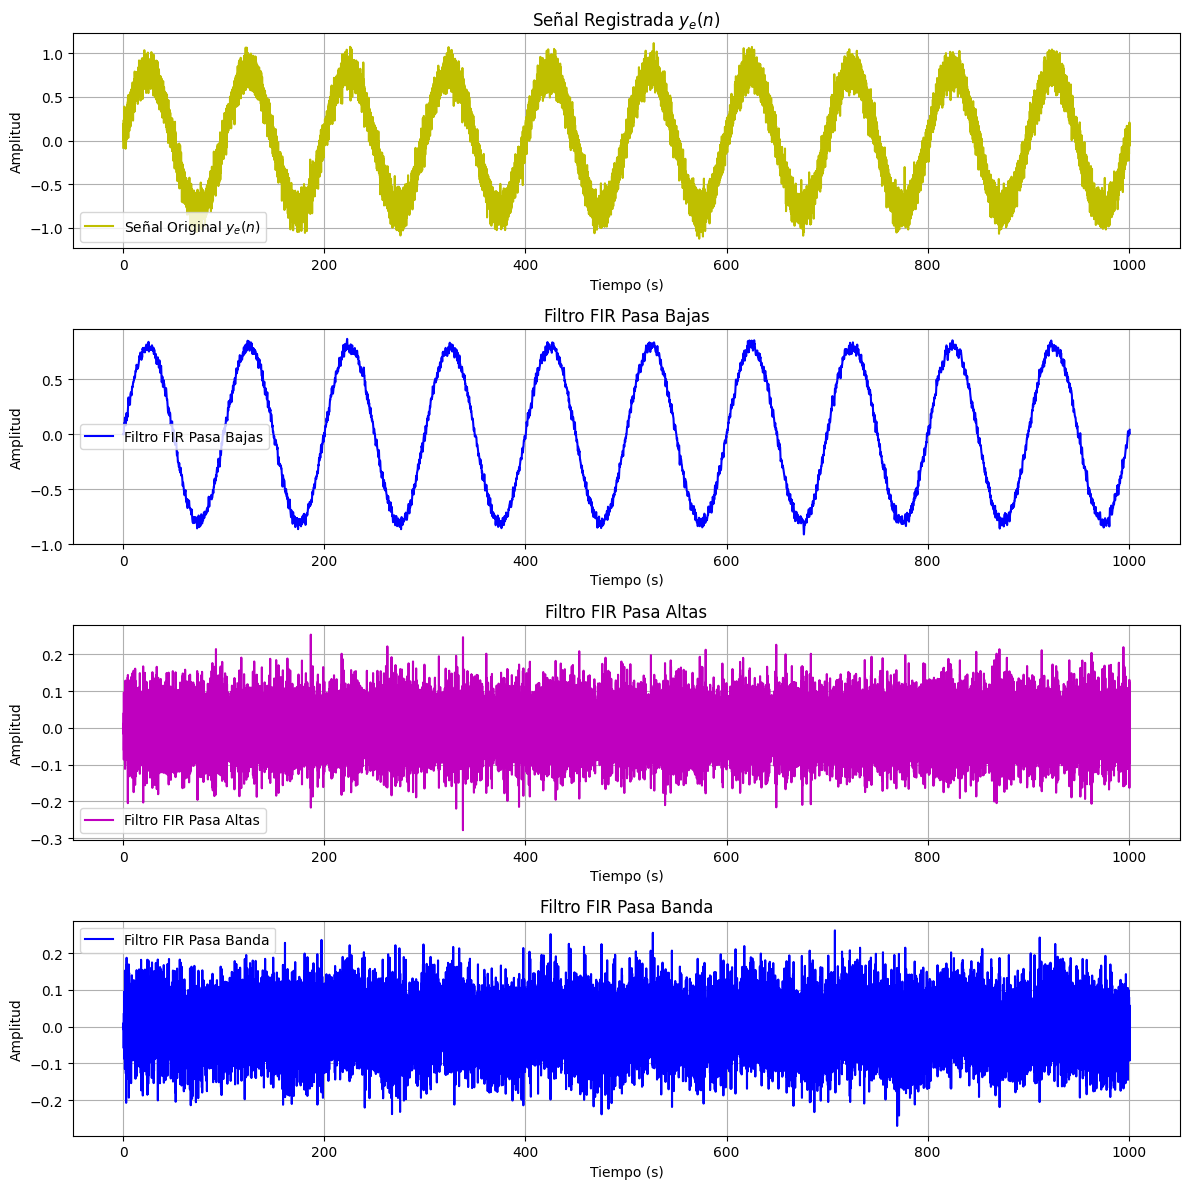

In [316]:
# --- Gr√°ficas de resultados ---
plt.figure(figsize=(12, 12))

# Se√±al original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Se√±al Original $y_e(n)$', color='y')
plt.title('Se√±al Registrada $y_e(n)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_fir_low, label='Filtro FIR Pasa Bajas', color='blue')
plt.title('Filtro FIR Pasa Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_fir_high, label='Filtro FIR Pasa Altas', color='m')
plt.title('Filtro FIR Pasa Altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_fir_band, label='Filtro FIR Pasa Banda', color='b')
plt.title('Filtro FIR Pasa Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar todas las gr√°ficas
plt.tight_layout()
plt.show()


#### Observaciones:
- Se observa que existen cambios en los filtros pasa bandas y pasa Altas en comparacion a la se√±al original , mientras que el filtro de pasa bajas sigue la forma de la se√±al original con mucho menos ruido lo cual podria indicar que este es el filtro mas efectivo para esta se√±al permitiendo visualizarla mejor. La frecuencia fundamental es bastante peque√±a por lo tanto se visualiza mas ruido gaussiano.

#### 2. FILTRO IIR

La funci√≥n iirfilter permite dise√±ar un filtro IIR, usando los parametros anteriores se disena el filtro IRR para Pasa bajas, altas y Banda.

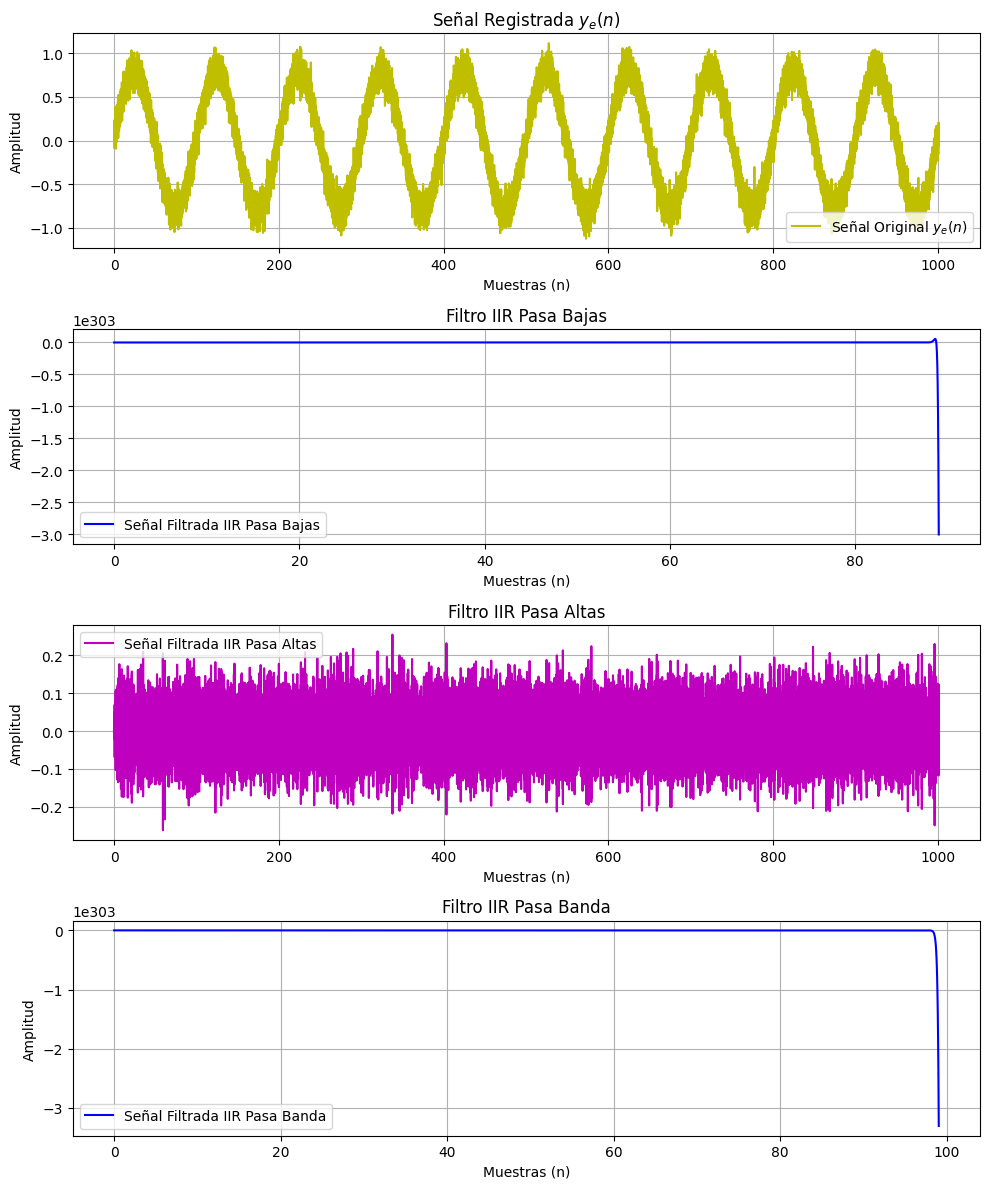

In [317]:
ordenIIR = 30
IIR_pasabajas = iirfilter(ordenIIR, wn1,  btype='low')
IIR_pasaltas = iirfilter(ordenIIR, wn2, btype='high')
IIR_pasabandas = iirfilter(ordenIIR, [wn1,wn2], btype='band')

                           
#filtros IIR a la se√±al ye(n)
y_e_iir_lowpass = lfilter(IIR_pasabajas[0], IIR_pasabajas[1], y_e)
y_e_iir_highpass = lfilter(IIR_pasaltas[0], IIR_pasaltas[1], y_e)
y_e_iir_bandpass = lfilter(IIR_pasabandas[0], IIR_pasabandas[1], y_e)

# Graficar las se√±ales
plt.figure(figsize=(10, 12))

# Se√±al original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, color='y', label='Se√±al Original $y_e(n)$')
plt.title('Se√±al Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Se√±al filtrada IIR Pasa Bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_iir_lowpass, color='blue', label='Se√±al Filtrada IIR Pasa Bajas')
plt.title('Filtro IIR Pasa Bajas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Se√±al filtrada IIR Pasa Altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_iir_highpass, color='m', label='Se√±al Filtrada IIR Pasa Altas')
plt.title('Filtro IIR Pasa Altas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Se√±al filtrada IIR Pasa Banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_iir_bandpass, color='b', label='Se√±al Filtrada IIR Pasa Banda')
plt.title('Filtro IIR Pasa Banda')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### NOTA: Se ve una respuesta totalmente inestable debido al orden del filtro, por ello corremos el c√≥digo nuevamente con un orden = 5

In [318]:
ordenIIR = 5
IIR_pasabajas = iirfilter(ordenIIR, wn1,  btype='low')
IIR_pasaltas = iirfilter(ordenIIR, wn2, btype='high')
IIR_pasabandas = iirfilter(ordenIIR, [wn1,wn2], btype='band')

                           
#filtros IIR a la se√±al ye(n)
y_e_iir_lowpass = lfilter(IIR_pasabajas[0], IIR_pasabajas[1], y_e)
y_e_iir_highpass = lfilter(IIR_pasaltas[0], IIR_pasaltas[1], y_e)
y_e_iir_bandpass = lfilter(IIR_pasabandas[0], IIR_pasabandas[1], y_e)

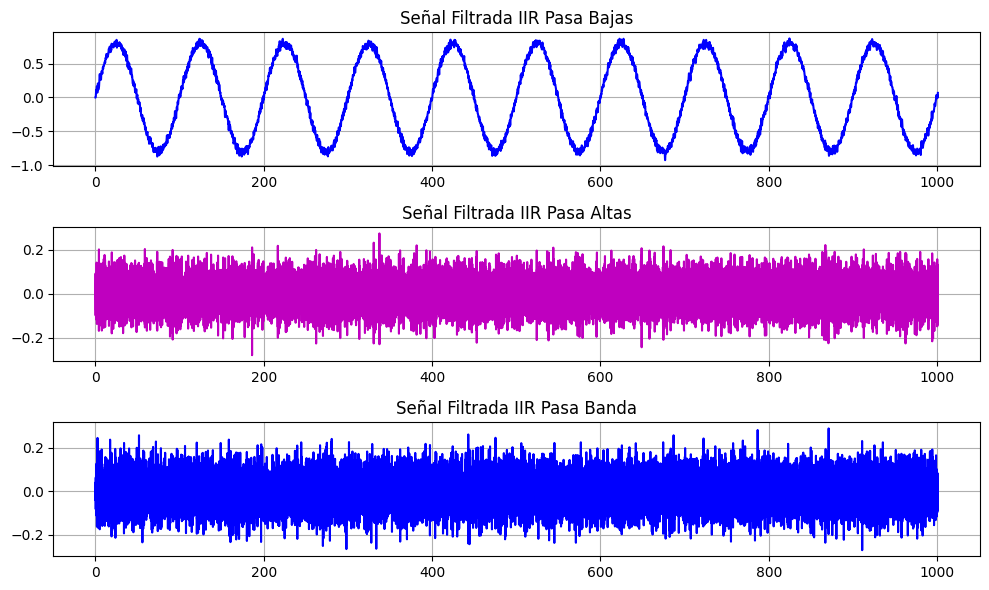

In [319]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(n, y_e_iir_lowpass,color='blue')
plt.title('Se√±al Filtrada IIR Pasa Bajas')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(n, y_e_iir_highpass, color='m')
plt.title('Se√±al Filtrada IIR Pasa Altas')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(n, y_e_iir_bandpass,color='b')
plt.title('Se√±al Filtrada IIR Pasa Banda')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Observaciones: 
En las graficas se muestran las se√±ales filtradas para comparar la efectividad de cada tipo de filtro, En las gr√°ficas se muestran las se√±ales originales y filtradas para comparar la efectividad de cada tipo de filtro. Se puede observar que el filtro IIR da mejores resultados en comparaci√≥n con el filtro anterior, especialmente en t√©rminos de reducci√≥n de ruido y la preservaci√≥n de caracter√≠sticas relevantes de la se√±al. Se visualiza un comportamiento transitorio m√°s notable,
 
- FIltro Pasa bajas permite el paso de se√±ales con frecuencias por debajo de un valor de 1,25 muestras y atenua las frecuencias mayores por esto se puede notar mayor amplitud siendo una onda mas plana porque elimina los picos de la frecuencia. 
- Pasa Altas permite solo el paso de las  frecuencias por encima del valor 7,5 muestras , en la grafica se muestra que  las frecuencias inferiores son bajas o pr√°cticamente inexistentes.
- filtro pasa banda solo permite el paso de el rango especifico.

En la comparaci√≥n entre filtros FIR e IIR, los FIR son m√°s estables y lineales en fase, aunque requieren un mayor orden (m√°s coeficientes) para lograr una respuesta de filtrado similar a la de un IIR. Por otro lado, los IIR, al necesitar un orden menor, alcanzan la misma respuesta con menos coeficientes para las condiciones dadas (no siempre es asi), pero son m√°s susceptibles a la inestabilidad, especialmente en √≥rdenes altos. En la pr√°ctica, al aumentar el orden del filtro IIR a 30, se observ√≥ inestabilidad, manifestada como amplificaci√≥n excesiva y respuestas incorrectas. Esto oblig√≥ a reducir el orden del IIR para obtener una respuesta estable, destacando que los FIR suelen ser la mejor opci√≥n en aplicaciones que demandan estabilidad y precisi√≥n en la respuesta de fase

### 3. Filtrado 
 

#### Las funciones lfilter y filtfilt filtran una secuencia de informaci√≥n x(n) usando un filtro IIR o FIR.  Se pruaba las funciones con Pasa bajas FIR e IIR

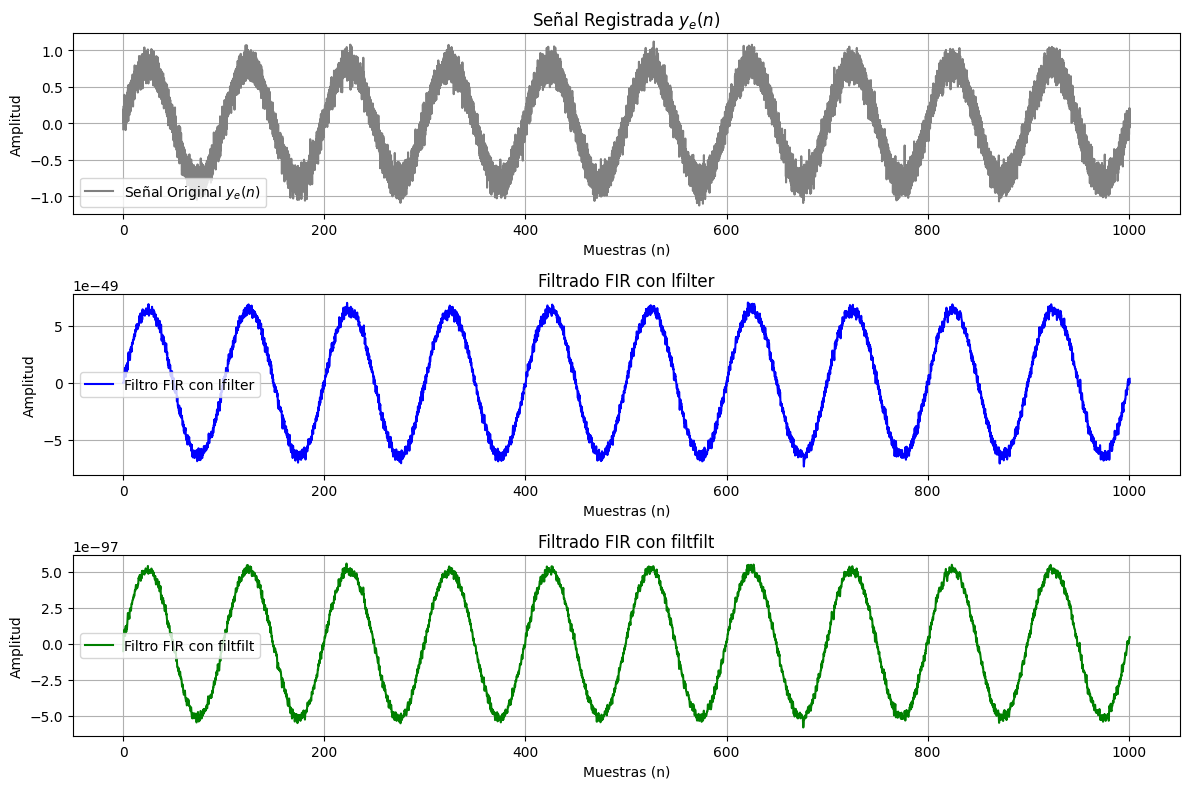

In [320]:
# Filtrado FIR usando lfilter
y_e_fir_low_lfilter = lfilter(b_low, 1.0, y_e)

# Filtrado FIR usando filtfilt
y_e_fir_low_filtfilt = signal.filtfilt(b_low, 1.0, y_e)

# Gr√°ficas para FIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Se√±al Original $y_e(n)$', color='gray')
plt.title('Se√±al Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_fir_low_lfilter, label='Filtro FIR con lfilter', color='blue')
plt.title('Filtrado FIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_fir_low_filtfilt, label='Filtro FIR con filtfilt', color='green')
plt.title('Filtrado FIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### ¬øPor qu√© se utiliza s√≥lo el numerador? ¬øA qu√© hace referencia el numerador? 

Se utiliza solo el numerador porque este dise√±o no incluye retroalimentaci√≥n. En los filtros FIR, la salida es una combinaci√≥n lineal de las entradas actuales y pasadas, sin depender de las salidas anteriores. Este tipo de filtro, al tener una respuesta finita al impulso, significa que su salida eventualmente se desvanecer√° a cero despu√©s de un n√∫mero limitado de muestras. El numerador representa los coeficientes que determinan esta respuesta al impulso, haciendo referencia a c√≥mo las muestras de entrada afectan a la salida del filtro.

### ¬øEvidencia cambios en el uso de las funciones de filtrado? ¬øC√≥mo se puede explicar la falta de coincidencia? 

En la grafica se puede evidenciar cambios en el uso de las funciones filtradas , se observa que con el Fitrado Filtfilt no hay desfase , mientras con el ifilter si lo hay . Esto se debe  a que la salida del filtro ifilter depende de las muestras pasadas, causando as√≠ cierta distorsi√≥n temporal. Por otro lado, filtfilt aplica el filtro en ambas direcciones, hacia adelante y hacia atr√°s, eliminando el desfase y logrando una mejor conservaci√≥n de la forma original de la se√±al. Sin embargo, filtfilt puede generar efectos de borde en los extremos de la se√±al debido a su proceso de doble paso.

### ¬øEs adecuado el orden del filtro usado? Analice.
El orden 30 para el filtro FIR es adecuado ya que permite una buena precisi√≥n, pero si se e se podr√≠a aumentar el orden del filtro para una mejor definici√≥n en la banda de paso o corte. Aunque esto aumenta el uso de recursos y memoria.




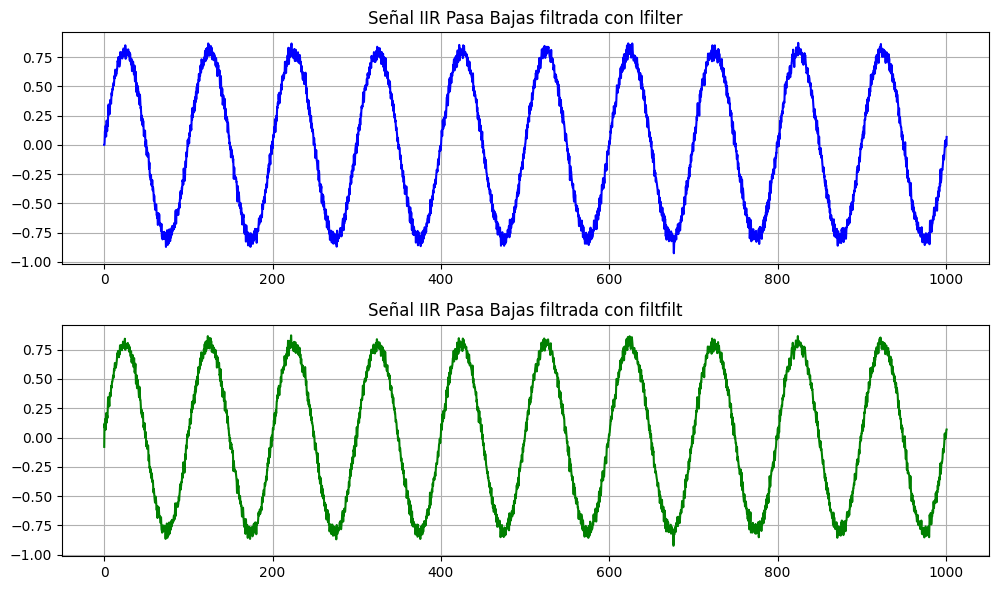

In [321]:
# Dise√±o del filtro IIR Pasa Bajas
iir_lowpass = iirfilter(ordenIIR, wn1, btype='low', ftype='butter')

# Filtrado usando lfilter y filtfilt (filtro IIR pasa bajas)
ye_n_iir_lowpass_lfilter = lfilter(iir_lowpass[0], iir_lowpass[1], y_e)
ye_n_iir_lowpass_filtfilt = filtfilt(iir_lowpass[0], iir_lowpass[1], y_e)

# Gr√°fica de las se√±ales filtradas IIR con lfilter y filtfilt
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, ye_n_iir_lowpass_lfilter, label='lfilter (Pasa Bajas IIR)', color='blue')
plt.title('Se√±al IIR Pasa Bajas filtrada con lfilter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, ye_n_iir_lowpass_filtfilt, label='filtfilt (Pasa Bajas IIR)',color='green')
plt.title('Se√±al IIR Pasa Bajas filtrada con filtfilt')
plt.grid(True)

plt.tight_layout()
plt.show()


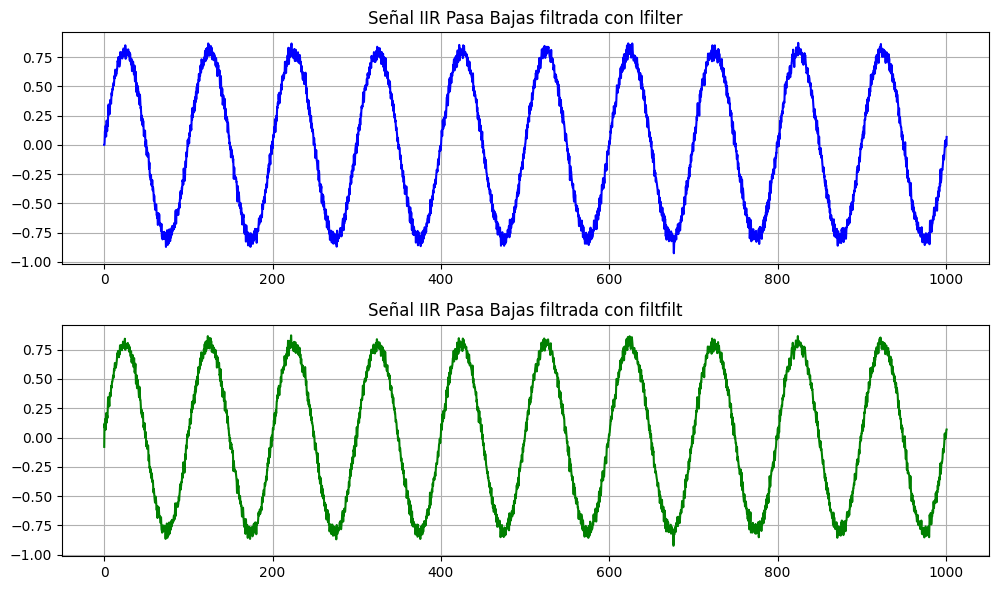

In [322]:
# Dise√±o del filtro IIR Pasa Bajas
iir_lowpass = iirfilter(ordenIIR, wn1, btype='low', ftype='butter')

# Filtrado usando lfilter y filtfilt (filtro IIR pasa bajas)
ye_n_iir_lowpass_lfilter = lfilter(iir_lowpass[0], iir_lowpass[1], y_e)
ye_n_iir_lowpass_filtfilt = filtfilt(iir_lowpass[0], iir_lowpass[1], y_e)

# Gr√°fica de las se√±ales filtradas IIR con lfilter y filtfilt
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, ye_n_iir_lowpass_lfilter, label='lfilter (Pasa Bajas IIR)', color='blue')
plt.title('Se√±al IIR Pasa Bajas filtrada con lfilter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, ye_n_iir_lowpass_filtfilt, label='filtfilt (Pasa Bajas IIR)',color='green')
plt.title('Se√±al IIR Pasa Bajas filtrada con filtfilt')
plt.grid(True)

plt.tight_layout()
plt.show()

### ¬øPor qu√© se utiliza el numerador y denominador? ¬øEs necesario cambiar el orden del filtro? En tal caso h√°galo y analice. 

#### En los filtros IIR, el numerador representa los coeficientes de la parte de entrada, mientras que el denominador corresponde a los coeficientes de retroalimentaci√≥n. Como estos filtros tienen una respuesta infinita al impulso, las salidas dependen de sus valores anteriores.

#### Si se requiere una mayor atenuaci√≥n en las bandas de paso o corte, podr√≠a ser necesario ajustar el orden del filtro IIR. Generalmente, los filtros IIR necesitan un orden menor que los FIR para lograr una respuesta similar, aunque la estabilidad de los IIR tambi√©n puede depender de un orden adecuado.

#### Con lfilter(IIR) se produce un desfase similar al de los FIR, aunque los IIR son m√°s eficientes en t√©rminos de recursos al usar √≥rdenes menores. Al emplear filtfilt(IIR), se elimina el desfase pero, al igual que en los FIR, pueden aparecer efectos de borde. En este caso, un orden t√≠pico como el 4 es adecuado, aunque puede ajustarse si es necesario.

### 4. APLICACI√ìN

Carga de la se√±al, canal 1 y definicion de la Fs

In [323]:
fs=500
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Biose√±ales\\lab\\Practica 6"
#datos = np.loadtxt("c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Biose√±ales\\lab\\Pr√°ctica 6\\senal_filtros.txt") 
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6"
datos = np.loadtxt("/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6/senal_filtros.txt")

datos
canal1 = datos[:,0]
print("Forma de la se√±al cargada:", canal1.shape)
print("Tama√±o de la se√±al cargada:", canal1.size)
canal1

Forma de la se√±al cargada: (60000,)
Tama√±o de la se√±al cargada: 60000


array([-7.0306, -7.0157, -7.0426, ..., -7.5644, -7.5477, -7.5434])

Realice un an√°lisis frecuencial con la funci√≥n que permite calcular el periodograma de Welch de una se√±al ¬øHay presencia de ruido el√©ctrico? Analice

In [324]:
import pandas as pd
file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)
file.head()

0       1       2       3       4       5       6       7       8   \
0 -7.0306 -3.5899 -2.7995 -6.8884  0.9126 -6.7908  4.3411  6.5558  2.5295   
1 -7.0157 -3.5755 -2.7809 -6.8658  0.9288 -6.7672  4.3691  6.5822  2.5637   
2 -7.0426 -3.6058 -2.7972 -6.8852  0.9068 -6.7855  4.3449  6.5713  2.5465   
3 -7.0599 -3.6356 -2.8107 -6.8951  0.8900 -6.8084  4.3239  6.5683  2.5225   
4 -7.0538 -3.6399 -2.7953 -6.8751  0.9060 -6.7994  4.3398  6.5981  2.5667   

       9       10      11      12      13      14      15  
0 -3.5293 -0.1973 -0.8435  0.7202  1.1319  1.3364 -7.3164  
1 -3.5019 -0.1715 -0.8095  0.7518  1.1564  1.3747 -7.2797  
2 -3.5271 -0.1917 -0.8273  0.7263  1.1290  1.3568 -7.2978  
3 -3.5532 -0.2127 -0.8512  0.6976  1.0976  1.3305 -7.3204  
4 -3.5144 -0.1691 -0.8081  0.7417  1.1319  1.3765 -7.2710

<Figure size 640x480 with 0 Axes>

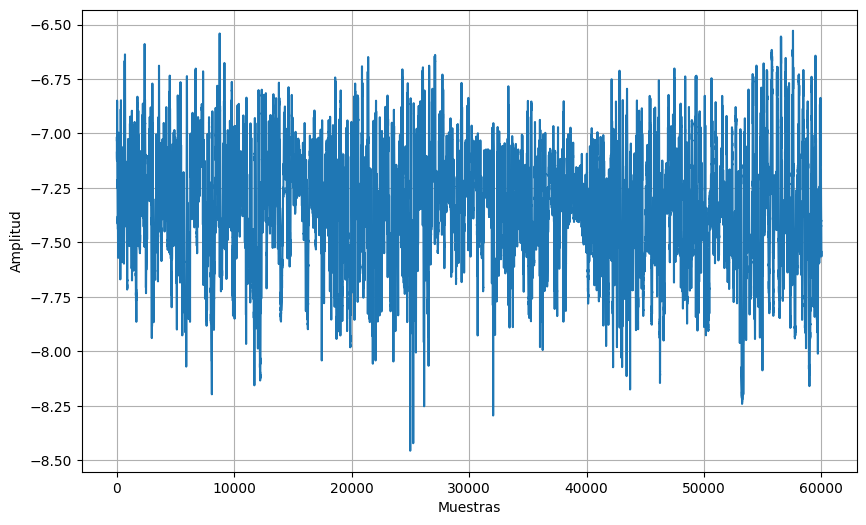

In [325]:
canal_1 = file[0]
fs = 500
canal_1.size
plt.figure()
plt.figure(figsize=(10, 6))
plt.plot(canal_1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

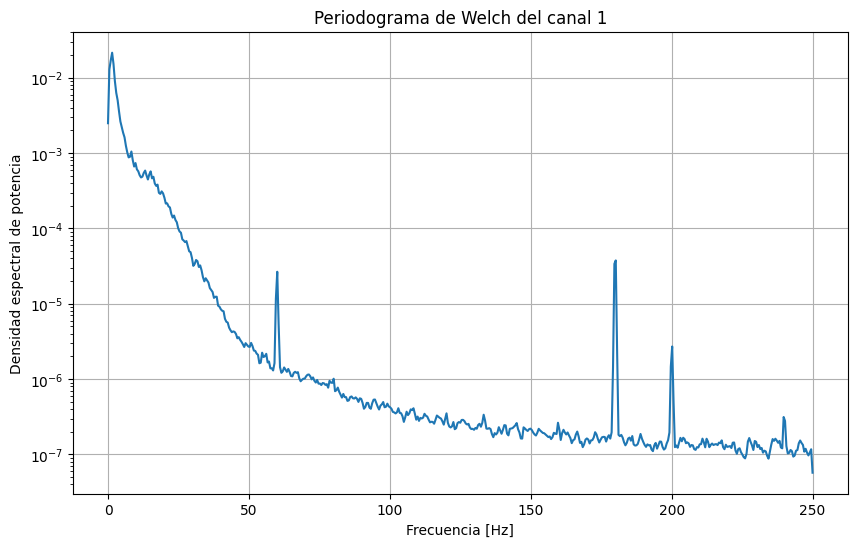

En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica


In [326]:
f, Pxx_den = signal.welch(canal1, fs, nperseg=1024)# Calcular el periodograma de Welch
plt.figure(figsize=(10, 6))# Graficar el periodograma
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()

print('En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica')

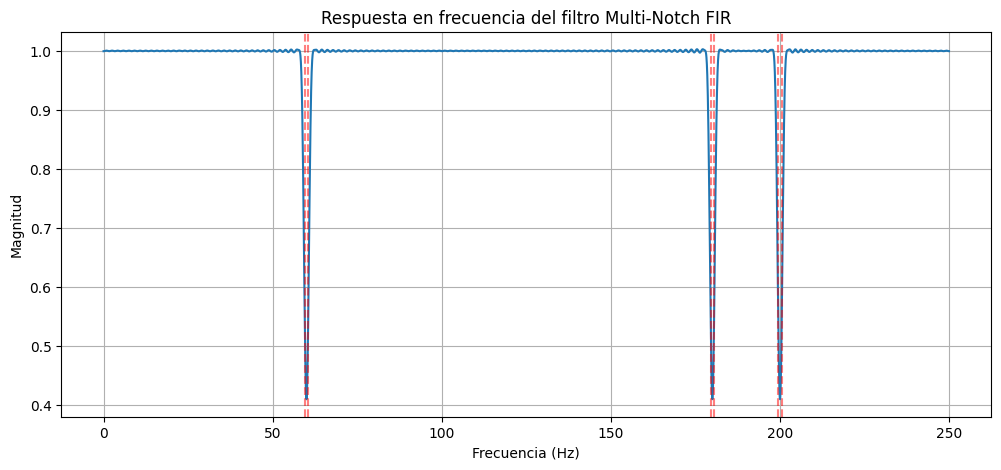

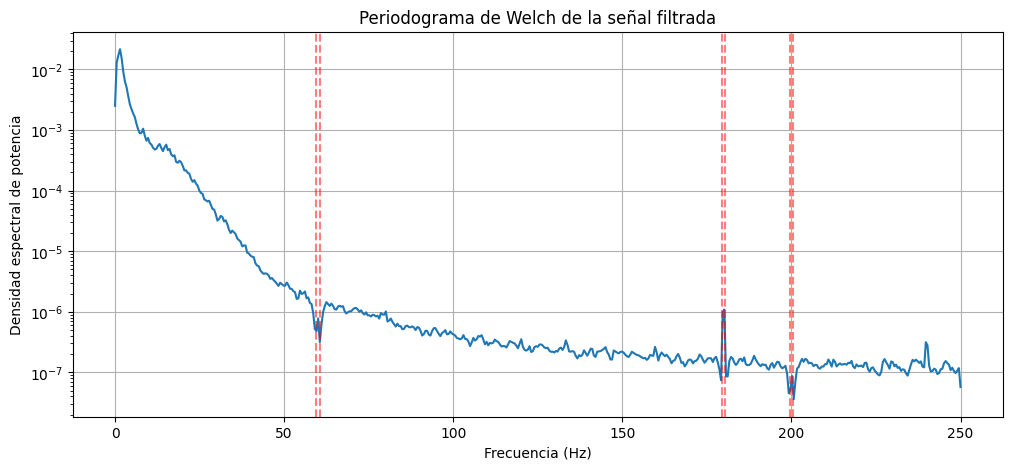

In [327]:
# Par√°metros del filtro
fs = 500  # Frecuencia de muestreo
nyq = fs/2
orden = 600 # orden muy alto para que solo se para una gran presicion

# Definir las frecuencias de ruido y sus anchos de banda
freq_ruido = [60, 180, 200]  # Frecuencias donde hay de ruido
bw = 1  # Ancho de banda 

# Crear arrays de frecuencias normalizadas
freq_norm = []
for fn in freq_ruido:
    freq_norm.extend([(fn - bw/2)/nyq, (fn + bw/2)/nyq])

# Dise√±o del filtro multi-notch
notch = signal.firwin(orden + 1, freq_norm, pass_zero='bandstop', window='hamming')

# Aplicar el filtro
filtered_signal = signal.filtfilt(notch, 1, canal_1)

# Visualizar la respuesta en frecuencia del filtro
w, h = signal.freqz(notch, worN=8000)
plt.figure(figsize=(12, 5))
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Respuesta en frecuencia del filtro Multi-Notch FIR')
plt.grid(True)
for fn in freq_ruido:
    plt.axvline(x=fn-bw/2, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=fn+bw/2, color='r', linestyle='--', alpha=0.5)
plt.show()

# Calcular y graficar el periodograma de Welch de la se√±al filtrada
f_filtered, Pxx_filtered = signal.welch(filtered_signal, fs=fs, nperseg=1024)
plt.figure(figsize=(12, 5))
plt.semilogy(f_filtered, Pxx_filtered)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la se√±al filtrada')
plt.grid(True)
for fn in freq_ruido:
    plt.axvline(x=fn-bw/2, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=fn+bw/2, color='r', linestyle='--', alpha=0.5)
plt.show()



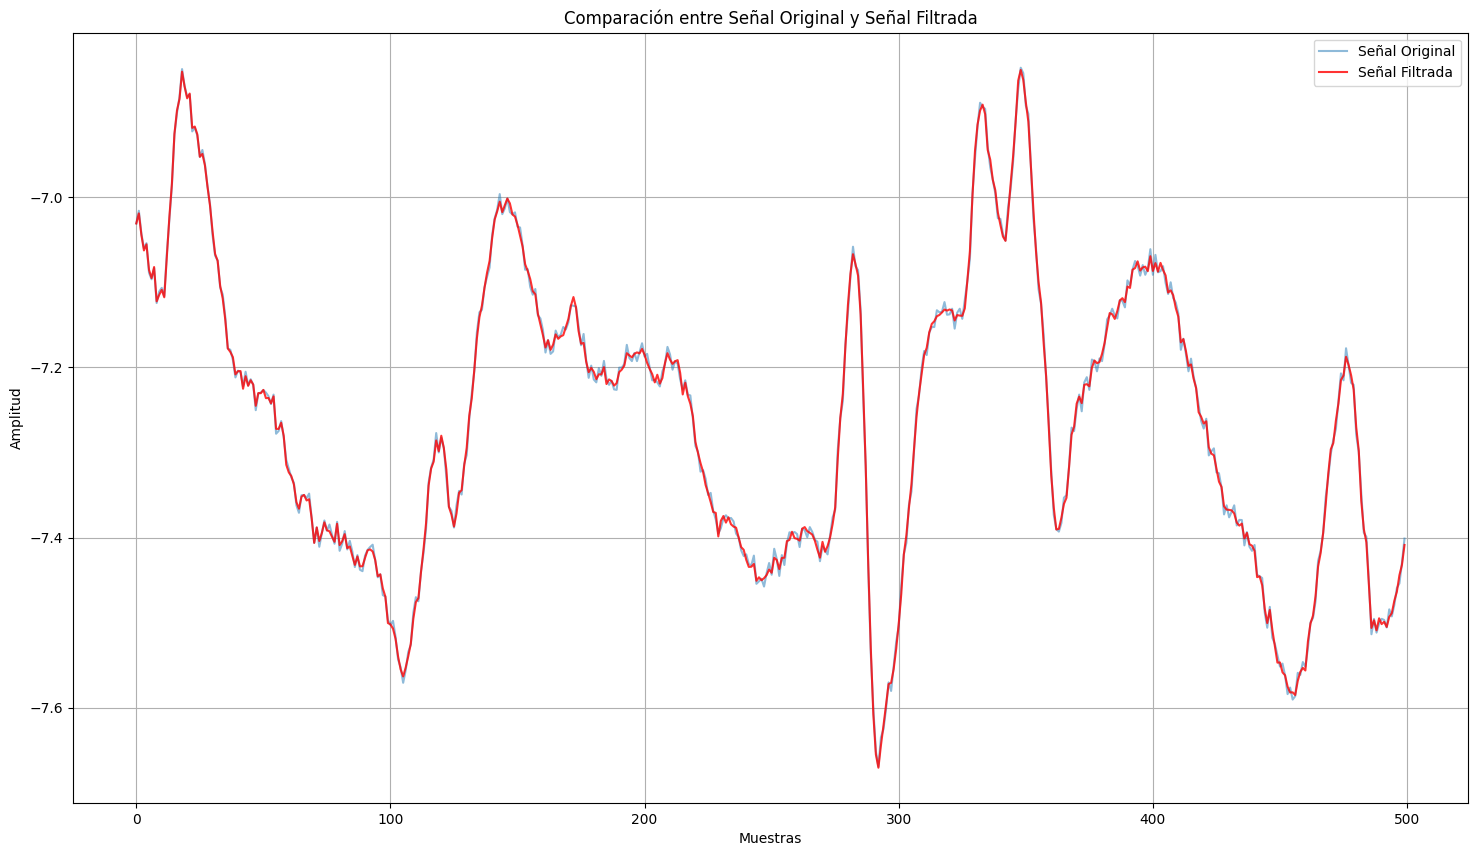

In [328]:
import matplotlib.pyplot as plt

#  se√±al original y filtrada en la misma figura
plt.figure(figsize=(18, 10))

# Graficar la se√±al original
plt.plot(canal_1[:500], label='Se√±al Original', alpha=0.5)  
# Graficar la se√±al filtrada
plt.plot(filtered_signal[:500], label='Se√±al Filtrada', alpha=0.8, color='r')

# T√≠tulos y etiquetas
plt.title('Comparaci√≥n entre Se√±al Original y Se√±al Filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Mostrar gr√°fica
plt.show()


### Observaciones: 
El an√°lisis del periodograma y la respuesta en frecuencia del filtro Multi-Notch FIR muestra beunos resultados. Se observa que el filtro implementado con tres bandas de rechazo (centradas en 60, 180 y 200 Hz)logr√≥ eliminar las componentes de ruido no deseados, lo cual se evidencia en la ausencia de los picos caracter√≠sticos que estaban presentes en la se√±al original. La respuesta en frecuencia del filtro muestra bandas de rechazo estrechas y precisas. El periodograma de la se√±al filtrada confirma la efectividad del filtrado, mostrando una tendencia decreciente natural en la densidad espectral de potencia y manteniendo la integridad de la se√±al en las frecuencias de inter√©s, particularmente en las bajas frecuencias (< 50 Hz), sin introducir distorsiones significativas o artefactos en el resto del espectro.

 Se Observa que la se√±al original tiene ruido con alta frecuencia, y al aplicar el filtro pasa-bajas se han reflejado cambios disminuyendo el ruido notoriamente siendo suavizada. Ademas la respuesta al impulso del filtro confirma que estamos ante un filtro pasa-bajos Adem√°s, la respuesta al impulso del filtro confirma su funci√≥n como pasa-bajos, ya que aten√∫a eficazmente las frecuencias altas y permite que las bajas pasen sin alteraciones  demostrando que el filtro cumplio su proposito.

### Conclusiones  

- Los filtros digitales representan una herramienta ideal para el  procesamiento de se√±ales, permiti√©ndonos manipular con precisi√≥n sus caracter√≠sticas frecuenciales, ademas no dependen de componente fisicos lo cual no tiene errores por tolerancia. 
- Se observo que los filtros pasa altas son utiles para eliminar ruido de baja frecuencia, mientras que los filtros pasa banda son eficaces para enfocarse en un rango espec√≠fico de frecuencias. 
- Los filtros FIR son una excelente opci√≥n cuando se necesita que la se√±al mantenga su forma y coherencia en el tiempo son mas f√°ciles de dise√±ar, ofrecen una respuesta en fase lineal, lo que significa que todas las frecuencias se procesan de manera uniforme. Mientras que los filtros IIR son m√°s eficientes en t√©rminos de recursos. Utilizan un menor n√∫mero de coeficientes para alcanzar resultados similares, lo que facilita su implementaci√≥n, pero puede llevar a distorsiones en la fase. 

#### REFERENCIAS

1. Diapositivas de clase 
2. Pysdr (n.d.), los filtros digitales se dividen en dos categor√≠as principales: FIR e IIR, donde cada uno presenta caracter√≠sticas y ventajas distintas. https://pysdr.org/es/content-es/filters.html
3. Editorial Redipe. (n.d.). T√≠tulo del documento. Recuperado de https://editorial.redipe.org/index.php/1/catalog/download/129/229/4655?inline=1